
Задание 1. Произведите автоматический сбор информации из Интернет-ресурса по отзывам посетителей.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Функция для парсинга страницы и извлечения данных
def parse_page(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        review_elements = soup.find_all('div', class_='review-wrap')
        reviews_data = []

        for review in review_elements:
            restaurant_name_element = review.find('a', href=True)
            if restaurant_name_element:
                restaurant_name = restaurant_name_element.text.strip()
            else:
                continue  # Переходим к следующему review, если <a> не найден

            review_date = review.find('div', class_='review-date').text.strip()
            rating = review.find('div', class_='review-rating').find('span').text.strip()
            review_text_full = review.find('span', class_='review-text-full')

            if review_text_full:
                review_text = review_text_full.text.strip()
            else:
                review_text_preview = review.find('span', class_='review-text-preview')
                review_text = review_text_preview.text.strip() if review_text_preview else ""

            review_data = {
                'Restaurant Name': restaurant_name,
                'Review Date': review_date,
                'Rating': rating,
                'Review Text': review_text
            }
            reviews_data.append(review_data)

        return reviews_data

    else:
        print(f"Ошибка при запросе страницы. Код ответа: {response.status_code}")
        return []

# URL веб-страницы для парсинга
base_url = 'https://www.restoran.ru/msk/opinions/?PAGEN_1='

# Количество страниц для парсинга
num_pages = 1000  # Здесь можно указать желаемое количество страниц

# Создайте список для хранения данных отзывов со всех страниц
all_reviews_data = []

# Перебирайте страницы и выполняйте парсинг
for page_num in range(1, num_pages + 1):
    page_url = base_url + str(page_num)
    page_reviews_data = parse_page(page_url)
    all_reviews_data.extend(page_reviews_data)

# Создайте DataFrame из всех данных отзывов
df = pd.DataFrame(all_reviews_data)

# Сохраните DataFrame в файл или выполните другие операции по необходимости


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/datasets/rest_df.csv')

In [3]:
df

,Restaurant Name,Review Date,Rating,Review Text
0,Клуб Hot Collection / Хот Коллекшн,15 сентября 2023,5.0,"Мне нравится декор и освещение в этом клубе, х..."
1,Ресторан Birds,14 сентября 2023,3.9,Отличное место!!! Все суппер!!! Очень понравил...
2,Клуб Hot Collection / Хот Коллекшн,14 сентября 2023,5.0,Очень замечательное место с прекрасными видами...
3,Банкетный зал Сосны в отеле Роял Зенит,13 сентября 2023,5.0,Классное место! Атмосфера приятная и расслабле...
4,Клуб Hot Collection / Хот Коллекшн,13 сентября 2023,5.0,"Мне понравилась праздничная атмосфера, веселье..."
...,...,...,...,...
16619,Ответить,6 февраля 2016,5.0,В этом прекрасном ресторане мы отмечали аж 3 м...
16620,Бар The Old School Pub,6 февраля 2016,4.0,Побывали с подругой недавно в этом баре. Назва...
16621,Ресторан Mandarin Combustible,6 февраля 2016,1.0,Очень любим китайскую и азиатскую кухню и реши...
16622,Ресторан Molon Lave / Молон Лаве,6 февраля 2016,5.0,Лучший из ресторанов Москвы с традиционной кух...


Задание 2. Проведите предпроцессинг данных (очистку данных, удалите выбросов, пустые значения и т.д). Выполните описательную статистику.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16624 entries, 0 to 16623
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant Name  16624 non-null  object 
 1   Review Date      16624 non-null  object 
 2   Rating           16612 non-null  float64
 3   Review Text      16596 non-null  object 
dtypes: float64(1), object(3)
memory usage: 519.6+ KB


In [5]:
#удаляем дубликаты
df = df.drop_duplicates()

In [6]:
# Сохраните DataFrame в файл или выполните другие операции по необходимости
df.to_csv('/content/drive/MyDrive/datasets/rest_df.csv', index=False)

In [7]:
# удаляем удаленные отзывы
df = df[df['Review Text']!='Отзыв удалён, поскольку не имеет отношения к данному заведению.']

In [8]:
len(df)

16619

In [9]:
df['Rating'].unique()

array([5. , 3.9, 4.9, 4.7, 4.8, 2. , 1.8, 1. , 1.9, 3.4, 4.6, 2.9, 4. ,
       3.7, 1.7, 1.3, 3.3, 4.3, 3.2, 4.2, 2.4, 3.8, 4.5, 2.7, 3. , 1.5,
       2.3, 1.4, 1.1, 2.6, 4.4, 2.8, 1.6, 4.1, 3.5, 3.6, 2.5, 1.2, 2.2,
       3.1, 2.1, nan, 0. ])

In [10]:
#удаляем пустые
df.dropna(inplace=True)

<ipython-input-10-47e7fae65186>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [11]:
# Округлите значения 'Rating' до целых чисел
df['Rating'] = df['Rating'].round().astype(int)

In [12]:
df['Rating'].unique()

array([5, 4, 2, 1, 3, 0])

In [13]:
df['Rating'].value_counts()

5    12379
1     2005
4      963
2      672
3      563
0        1
Name: Rating, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16583 entries, 0 to 16623
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Restaurant Name  16583 non-null  object
 1   Review Date      16583 non-null  object
 2   Rating           16583 non-null  int64 
 3   Review Text      16583 non-null  object
dtypes: int64(1), object(3)
memory usage: 647.8+ KB


In [15]:
import pandas as pd
from datetime import datetime

# Словарь для русских названий месяцев
months = {
    "января": 1, "февраля": 2, "марта": 3, "апреля": 4, "мая": 5, "июня": 6,
    "июля": 7, "августа": 8, "сентября": 9, "октября": 10, "ноября": 11, "декабря": 12
}

# Функция для преобразования строки в формат datetime
def parse_date(date_str):
    day, month, year = date_str.split()
    month_num = months.get(month.lower())
    if month_num:
        return datetime(int(year), month_num, int(day))
    else:
        return None



In [16]:
df['Review Date'] = df['Review Date'].apply(parse_date)

In [17]:
df['Rating'].value_counts()

5    12379
1     2005
4      963
2      672
3      563
0        1
Name: Rating, dtype: int64

In [18]:
df.describe()

,Rating
count,16583.000000
mean,4.268528
std,1.399882
min,0.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16583 entries, 0 to 16623
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Restaurant Name  16583 non-null  object        
 1   Review Date      16583 non-null  datetime64[ns]
 2   Rating           16583 non-null  int64         
 3   Review Text      16583 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 647.8+ KB


In [20]:
df

,Restaurant Name,Review Date,Rating,Review Text
0,Клуб Hot Collection / Хот Коллекшн,2023-09-15,5,"Мне нравится декор и освещение в этом клубе, х..."
1,Ресторан Birds,2023-09-14,4,Отличное место!!! Все суппер!!! Очень понравил...
2,Клуб Hot Collection / Хот Коллекшн,2023-09-14,5,Очень замечательное место с прекрасными видами...
3,Банкетный зал Сосны в отеле Роял Зенит,2023-09-13,5,Классное место! Атмосфера приятная и расслабле...
4,Клуб Hot Collection / Хот Коллекшн,2023-09-13,5,"Мне понравилась праздничная атмосфера, веселье..."
...,...,...,...,...
16619,Ответить,2016-02-06,5,В этом прекрасном ресторане мы отмечали аж 3 м...
16620,Бар The Old School Pub,2016-02-06,4,Побывали с подругой недавно в этом баре. Назва...
16621,Ресторан Mandarin Combustible,2016-02-06,1,Очень любим китайскую и азиатскую кухню и реши...
16622,Ресторан Molon Lave / Молон Лаве,2016-02-06,5,Лучший из ресторанов Москвы с традиционной кух...


In [21]:
df=df[df['Restaurant Name']!='Ответить']

Задание 3. Проведите анализ предметной области и сделайте несколько практических выводов, исходя из данных. (Визуализация и выводы)

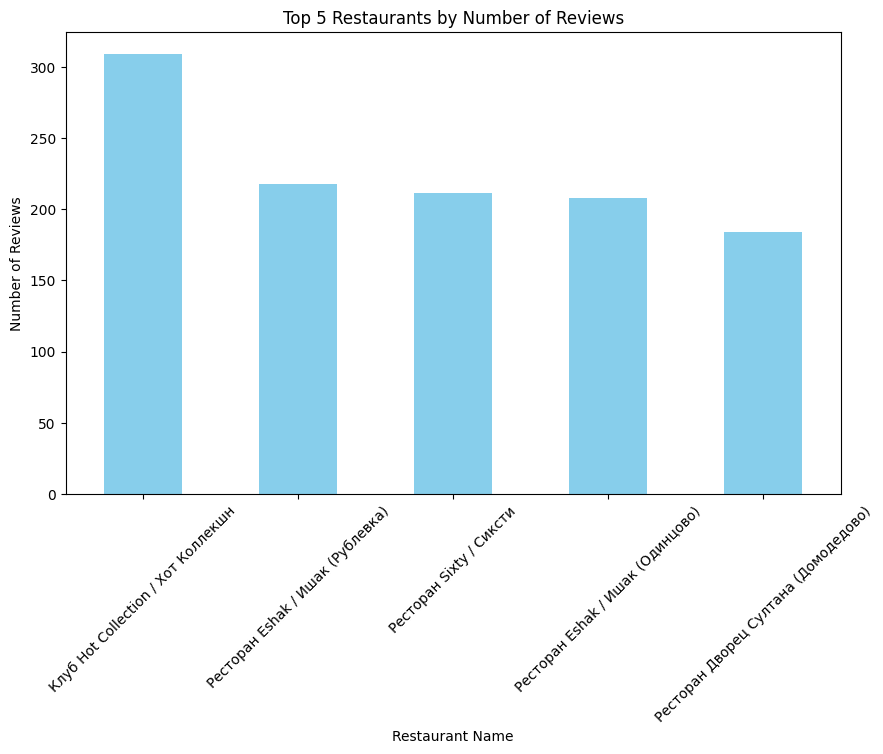

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

top_restaurants = df['Restaurant Name'].value_counts().head(5)

plt.figure(figsize=(10, 6))
top_restaurants.plot(kind='bar', color='skyblue')
plt.title('Top 5 Restaurants by Number of Reviews')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()


Text(0.5, 0, 'Restaurant Name')

<Figure size 1000x600 with 0 Axes>

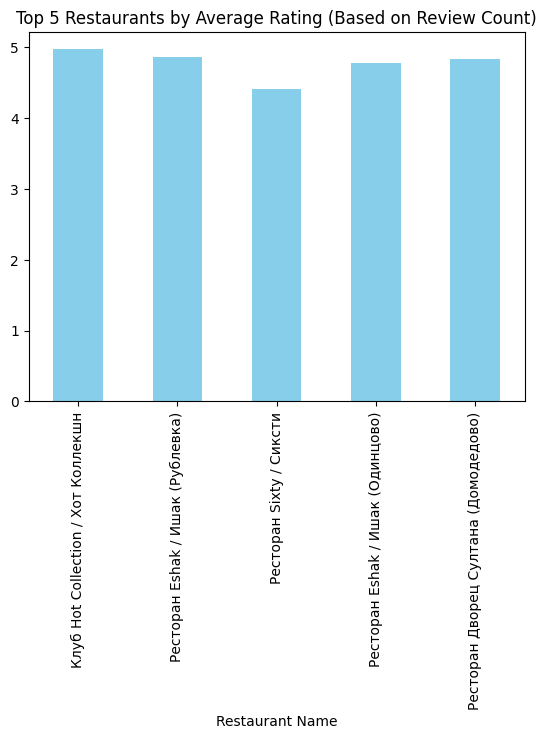

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

average_ratings = df.groupby('Restaurant Name')['Rating'].mean()

review_counts = df['Restaurant Name'].value_counts()

restaurant_stats = pd.DataFrame({'Average Rating': average_ratings, 'Review Count': review_counts})

top_restaurants = restaurant_stats.nlargest(5, 'Review Count')

plt.figure(figsize=(10, 6))
top_restaurants.plot(kind='bar', y='Average Rating', color='skyblue', legend=False)
plt.title('Top 5 Restaurants by Average Rating (Based on Review Count)')
plt.xlabel('Restaurant Name')


<ipython-input-24-499769b9f955>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Review Date'].dt.year


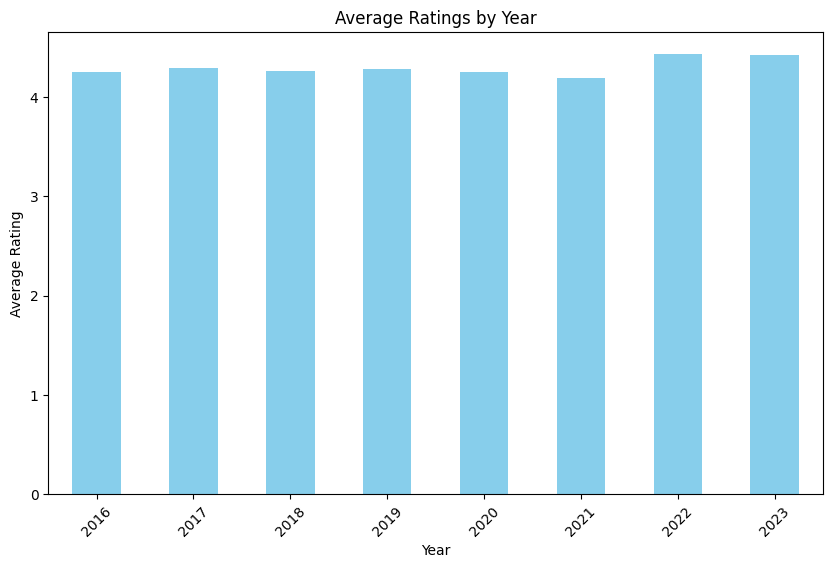

In [24]:
import matplotlib.pyplot as plt

df['Year'] = df['Review Date'].dt.year

average_ratings_by_year = df.groupby('Year')['Rating'].mean()


plt.figure(figsize=(10, 6))
average_ratings_by_year.plot(kind='bar', color='skyblue', legend=False)
plt.title('Average Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


Задание 4. Проведите обработку текста. Сравните классы

In [25]:
df = df[['Rating','Review Text']]

In [26]:
df

,Rating,Review Text
0,5,"Мне нравится декор и освещение в этом клубе, х..."
1,4,Отличное место!!! Все суппер!!! Очень понравил...
2,5,Очень замечательное место с прекрасными видами...
3,5,Классное место! Атмосфера приятная и расслабле...
4,5,"Мне понравилась праздничная атмосфера, веселье..."
...,...,...
16618,5,"Побывали сегодня в кафе на крыше ""Счастье"". На..."
16620,4,Побывали с подругой недавно в этом баре. Назва...
16621,1,Очень любим китайскую и азиатскую кухню и реши...
16622,5,Лучший из ресторанов Москвы с традиционной кух...


In [27]:
pip install nltk pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 58.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13705 sha256=d13f711860e33de3ebee712c1a42020a2b0b85ba5b1058c3651e30125a55dffa
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [28]:
import nltk
import pymorphy2
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [29]:
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from pymorphy2 import MorphAnalyzer

# Создаем объекты для токенизации и лемматизации
tokenizer = nltk.data.load('tokenizers/punkt/russian.pickle')
morph = MorphAnalyzer()

In [30]:
df['Review Text'] = df['Review Text'].apply(lambda x: [morph.parse(token)[0].normal_form for token in word_tokenize(x)])

In [31]:
df

,Rating,Review Text
0,5,"[я, нравиться, декор, и, освещение, в, это, кл..."
1,4,"[отличный, место, !, !, !, всё, суппер, !, !, ..."
2,5,"[очень, замечательный, место, с, прекрасный, в..."
3,5,"[классный, место, !, атмосфера, приятный, и, р..."
4,5,"[я, понравиться, праздничный, атмосфера, ,, ве..."
...,...,...
16618,5,"[побывать, сегодня, в, кафе, на, крыша, ``, сч..."
16620,4,"[побывать, с, подруга, недавно, в, это, бар, ...."
16621,1,"[очень, любим, китайский, и, азиатский, кухня,..."
16622,5,"[хороший, из, ресторан, москва, с, традиционны..."


In [32]:
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words("russian"))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [33]:
import re
def remove_stopwords(text):
    filtered_words = [word for word in text if word.lower() not in stop_words]
    s = re.sub(r'[^а-яА-Я0-9]+', ' ', " ".join(filtered_words))
    return s
df['Review Text'] = df['Review Text'].apply(remove_stopwords)
df

,Rating,Review Text
0,5,нравиться декор освещение это клуб хороший зву...
1,4,отличный место вс суппер очень понравиться кон...
2,5,очень замечательный место прекрасный вид замеч...
3,5,классный место атмосфера приятный расслабить э...
4,5,понравиться праздничный атмосфера веселие вост...
...,...,...
16618,5,побывать сегодня кафе крыша счастие название с...
16620,4,побывать подруга недавно это бар название инте...
16621,1,очень любим китайский азиатский кухня решить п...
16622,5,хороший ресторан москва традиционный кухня вс ...


In [34]:
df

,Rating,Review Text
0,5,нравиться декор освещение это клуб хороший зву...
1,4,отличный место вс суппер очень понравиться кон...
2,5,очень замечательный место прекрасный вид замеч...
3,5,классный место атмосфера приятный расслабить э...
4,5,понравиться праздничный атмосфера веселие вост...
...,...,...
16618,5,побывать сегодня кафе крыша счастие название с...
16620,4,побывать подруга недавно это бар название инте...
16621,1,очень любим китайский азиатский кухня решить п...
16622,5,хороший ресторан москва традиционный кухня вс ...


In [35]:
df = df[df['Rating'] != 0]

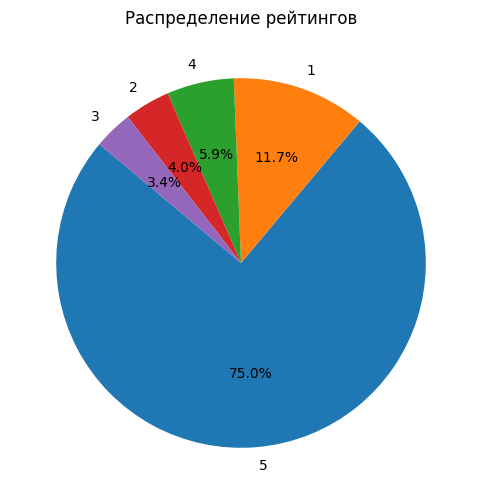

In [36]:
# Группируем данные по уникальным значениям столбца 'rating' и подсчитываем количество каждого значения
rating_counts = df['Rating'].value_counts()

# Создаем круговую диаграмму
plt.figure(figsize=(6, 6))  # Устанавливаем размер диаграммы (по желанию)
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)

# Добавляем заголовок
plt.title('Распределение рейтингов')

# Отображаем диаграмму
plt.show()


In [37]:
rating_counts

5    12164
1     1902
4      951
2      651
3      549
Name: Rating, dtype: int64

In [38]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Разделяем данные на признаки (X) и целевую переменную (y)
X = df.drop(columns=['Rating'])
y = df['Rating']

# Определяем количество примеров класса 1
count_class_1 = len(y[y == 1])

# Определяем классы, к которым будем применять OverSampling и UnderSampling
over_classes = [2, 3, 4]
under_class = 5

# Применяем Random OverSampling для классов 2, 3 и 4
oversampler = RandomOverSampler(sampling_strategy={cls: count_class_1 for cls in over_classes}, random_state=42)
X_over, y_over = oversampler.fit_resample(X, y)

# Применяем Random UnderSampling для класса 5
undersampler = RandomUnderSampler(sampling_strategy={under_class: count_class_1}, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_over, y_over)

# Собираем сбалансированные данные
balanced_df = pd.concat([X_resampled, y_resampled], axis=1)

# Выводим результат
print(balanced_df)

                                            Review Text  Rating
0     часто хинкали вчера заказать 4 человек хинкали...       1
1     отвратительный работать персонал ресторан понт...       1
2     отвратительный сервис отсутствие гибкость разд...       1
3      добрый день комментарий нет звонить сегоднять...       1
4     ночь 17 06 18 06 заказать салат греческий сала...       1
...                                                 ...     ...
9505  брать суп брать обязательно заказать пара леп ...       5
9506  замечательный место каждый день ходить обедать...       5
9507  замечательный качество приготовление блюдо пож...       5
9508  понравиться праздничный атмосфера веселие вост...       5
9509  наверное райский трапеза немногий место москва...       5

[9510 rows x 2 columns]


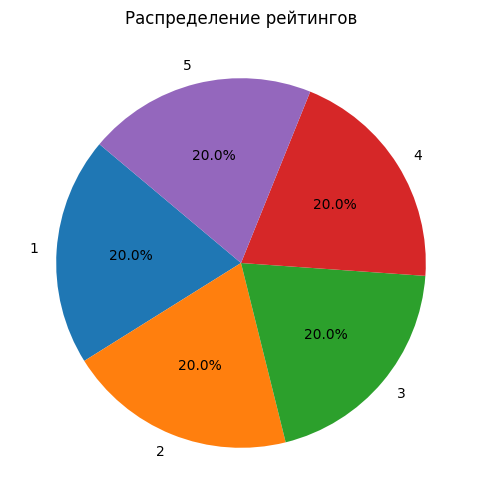

In [39]:
# Группируем данные по уникальным значениям столбца 'rating' и подсчитываем количество каждого значения
rating_counts = balanced_df['Rating'].value_counts()

# Создаем круговую диаграмму
plt.figure(figsize=(6, 6))  # Устанавливаем размер диаграммы (по желанию)
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)

# Добавляем заголовок
plt.title('Распределение рейтингов')

# Отображаем диаграмму
plt.show()

In [40]:
rating_counts

1    1902
2    1902
3    1902
4    1902
5    1902
Name: Rating, dtype: int64

In [41]:
balanced_df

,Review Text,Rating
0,часто хинкали вчера заказать 4 человек хинкали...,1
1,отвратительный работать персонал ресторан понт...,1
2,отвратительный сервис отсутствие гибкость разд...,1
3,добрый день комментарий нет звонить сегоднять...,1
4,ночь 17 06 18 06 заказать салат греческий сала...,1
...,...,...
9505,брать суп брать обязательно заказать пара леп ...,5
9506,замечательный место каждый день ходить обедать...,5
9507,замечательный качество приготовление блюдо пож...,5
9508,понравиться праздничный атмосфера веселие вост...,5


In [43]:
balanced_df.to_csv('/content/drive/MyDrive/datasets/balanced_df.csv', index=False)


In [ ]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
X = balanced_df['Review Text']
y = balanced_df['Rating']

# Создаем объект CountVectorizer для векторизации текста
vectorizer = CountVectorizer()

# Векторизуем текст
X = vectorizer.fit_transform(X)

# Разделяем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем словарь с методами машинного обучения
models = {
    'MultinomialNB': MultinomialNB(),
    'LogisticRegression': LogisticRegression(),
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier()
}

# Создаем DataFrame для сохранения результатов
results = pd.DataFrame(columns=['Method', 'Class', 'Precision', 'Recall', 'F1-score'])

# Проходим по каждому методу и оцениваем его производительность для каждого класса
for method, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    for class_label in sorted(y_test.unique()):
        precision = precision_score(y_test, y_pred, labels=[class_label], average='weighted')
        recall = recall_score(y_test, y_pred, labels=[class_label], average='weighted')
        f1 = f1_score(y_test, y_pred, labels=[class_label], average='weighted')

        result = pd.DataFrame({
            'Method': [method],
            'Class': [class_label],
            'Precision': [precision],
            'Recall': [recall],
            'F1-score': [f1]
        })

        results = pd.concat([results, result], ignore_index=True)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
results

,Method,Class,Precision,Recall,F1-score
0,MultinomialNB,1,0.639344,0.595420,0.616601
1,MultinomialNB,2,0.708861,0.765027,0.735874
2,MultinomialNB,3,0.765464,0.742500,0.753807
3,MultinomialNB,4,0.729508,0.463542,0.566879
4,MultinomialNB,5,0.618861,0.877437,0.725806
5,LogisticRegression,1,0.796296,0.547074,0.648567
6,LogisticRegression,2,0.762353,0.885246,0.819216
7,LogisticRegression,3,0.843823,0.905000,0.873341
8,LogisticRegression,4,0.699774,0.807292,0.749698
9,LogisticRegression,5,0.791045,0.738162,0.763689


1 класс хуже всего определяется

In [ ]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
X = balanced_df['Review Text']
y = balanced_df['Rating']

# Создаем объект CountVectorizer для векторизации текста
vectorizer = CountVectorizer()

# Векторизуем текст
X = vectorizer.fit_transform(X)

# Разделяем данные на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем словарь с методами машинного обучения
models = {
    'MultinomialNB': MultinomialNB(),
    'LogisticRegression': LogisticRegression(),
    'SVM': SVC(),
    'RandomForest': RandomForestClassifier()
}

# Создаем DataFrame для сохранения результатов
results = pd.DataFrame(columns=['Method', 'Run time', 'Training time', 'Test time', 'Accuracy'])

# Проходим по каждому методу и оцениваем его производительность
for method, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    start_time = time.time()
    y_pred = model.predict(X_test)
    test_time = time.time() - start_time

    accuracy = accuracy_score(y_test, y_pred)

    run_time = training_time + test_time

    result = pd.DataFrame({
        'Method': [method],
        'Run time': [run_time],
        'Training time': [training_time],
        'Test time': [test_time],
        'Accuracy': [accuracy]
    })

    results = pd.concat([results, result], ignore_index=True)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
results

,Method,Run time,Training time,Test time,Accuracy
0,MultinomialNB,0.006756,0.005876,0.000880,0.685594
1,LogisticRegression,5.048216,5.046975,0.001241,0.776025
2,SVM,24.294050,20.024112,4.269939,0.723449
3,RandomForest,20.189827,20.096021,0.093806,0.845952


RandomForest лучше всего определяет классы, но работает долго